(Entropy)=
# Entropy Change of Real and Idealized Processes

During the last chapter we motivated the idea of entropy from a statistical perspective and showed that for any real process the entropy (and multiplicity) is always maximized. This explains why there is a directionality to processes, such as the transfer of heat from hot to cold. And for any real process, there is always entropy generation and thus the entropy of the universe is increasing. Using our statistical interpreation with an assumption that entropy is an extensive thermodynamic property, we were able to derive a thermodynamic definition of entropy that relates the entropy change to the heat transfer divided by temperature. For a reversible process, these quantities are equal, and for an irreversible, or real, process we must also account for the entropy generation. In this chapter, we will build off of our concept of the thermodynamic definition of entropy to help analyze processes, similar to how we used internal energy and enthalpy to analyze processes in earlier chapters.

Recall from last chapter in the thermodynamic discussion of entropy ({numref}`ThermodynamicEntropy` {ref}`ThermodynamicEntropy`), the following equation

```{math}
:label: eq_a
dS = \frac{1}{T} dU + \frac{p}{T} dV
```

or in terms of specific properties 

```{math}
:label: eq_b
ds = \frac{1}{T} du + \frac{p}{T} dv
```

And upon rearrangement we see that

```{math}
:label: eq_c
Tds = du + pdv
```

Also, recall that 

```{math}
:label: eq_d
h = u + pv
```

which becomes the following after differentiation

```{math}
:label: eq_e
dh = du + pdv + vdp
```

And substituting {eq}`eq_c` into this we also get

```{math}
:label: eq_f
Tds = dh - vdp
```

And therefore, in addition to {eq}`eq_b` we get another expression for entropy in terms of enthalpy

```{math}
:label: eq_g
ds = \frac{1}{T} dh - \frac{v}{T} dp
```

## Entropy Change of Ideal Gases

From {eq}`eq_b` and {eq}`eq_g` we have two equations that can be used to determine entropy via integration with the appropriate equation of state. Perhaps the simplest is the ideal gas equation of state, from which we also prior derived relationships for enthalpy and entropy in terms of temperature only. See {numref}`UsingSpecificHeat` {ref}`UsingSpecificHeat`, where we showed that 

```{math}
:label: eq_h
du = c_{\rm v} dT
``` 

and 

```{math}
:label: eq_i
dh = c_{\rm p} dT
``` 

Using these two equations and the ideal gas law (i.e., $pv=RT$), we can rearrange {eq}`eq_b` and {eq}`eq_g` to show that 

```{math}
:label: eq_j
ds = \frac{c_{\rm v}}{T} dT + \frac{R}{v} dv
```

and

```{math}
:label: eq_k
ds = \frac{c_{\rm p}}{T} dT - \frac{R}{p} dp
```

which are now expressions that can be readily integrated because $c_{\rm v}$ and $c_{\rm p}$ are functions of temperature only for an ideal gas. Therefore

```{math}
:label: eq_k
s_2-s_1 = \int_{1}^{2} \frac{c_{\rm v} }{T} dT + R ln \frac{v_2}{v_1}
```

```{math}
:label: eq_l
s_2-s_1 = \int_{1}^{2} \frac{c_{\rm p} }{T} dT - R ln \frac{p_2}{p_1}
```

If it is assumed that specific heat is independent of temperature or linear with temperature, then {eq}`eq_k` and {eq}`eq_l` become

```{math}
:label: eq_m
s_2-s_1 = c_{\rm v} ln \frac{T_2}{T_1} + R ln \frac{v_2}{v_1}
```

```{math}
:label: eq_n
s_2-s_1 = c_{\rm p} ln \frac{T_2}{T_1} - R ln \frac{p_2}{p_1}
```

where $c_{\rm v}$ or $c_{\rm p}$ are the average values if it is assumed they are linear with temerature and not constant. Exact values for the integral are often tabulated in textbooks as a function of temperature in various forms, understanding that 

```{math}
:label: eq_o
\int_{T_1}^{T_2} \frac{c_{\rm p} }{T} dT = \int_{0}^{T_2} \frac{c_{\rm p} }{T} dT - \int_{0}^{T_1} \frac{c_{\rm p} }{T} dT
```

where the two right hand terms are now functions of a single temperature only and can be readily tabulated. Since we will be using Cantera to solve for property values this is not necessary to discuss in further detail, but in the case where only tables are avalable this is the approach often used. This is necessary because as can be seen from the equations above, entropy is not only a function of temperature, like enthalpy and internal energy and cannot therefore themselves be easily tabulated in a similar manner. Lets see how we can evaluate entropy changes of an ideal gas using specific heats and compare it to the output directly from Cantera.

(EntropyChangeIdealGasExample1)=
#### Example - Evaluating Entropy Change of an Ideal Gas With and Without Specific Heats

Consider oxygen that is heated from 300 K to 1500 K. Assume that during this process the pressure is decreased from 200 to 150 kPa and that oxygen behaves ideally. Calculate the change in specific entropy, s, using Cantera and with specific heats.

> **Solution** - We know the initial temperature and pressure, so solving with Cantera should be straightforward. Using these two properties we can also solve directly using {eq}`eq_o`. We will obtain the specific heat from Cantera, assuming it is contstant and at 300 K.

In [1]:
import cantera as ct
#State 1
T1 = 300 #K
P1 = 200*1000 # Pa

species1 = ct.Oxygen()# define state 1
species1.TP = T1, P1

#State 2
T2= 1500 #K
P2 = 150*1000 # Pa

species2 = ct.Oxygen()# define state 2
species2.TP = T2, P2

#Using Cantera directly

ds=species2.SP[0]-species1.SP[0]

print(round(ds, 2), "J/kg using Cantera")

1724.55 J/kg using Cantera


In [2]:
import numpy as np
species1 = ct.Oxygen()
cp = species1.cp # cp at 300 K, the default temperature
ds = cp*np.log(T2/T1)-8.314/32*np.log(P2/P1)
print(round(ds, 2), "J/kg using specific heat equation")

1480.69 J/kg using specific heat equation


## Isentropic Processes of Ideal Gases

```{index} isentropic process
```

When the entropy change during a process remains unchanged, this is referred to as an  {ref}`isentropic process <genindex>`. When compression or expansion processes occur reversibly and adiabatically, then they are also by definition isentropic. This can be seen readily from our equation relating entropy to heat transfer discussed in {numref}`ThermodynamicEntropy` {ref}`ThermodynamicEntropy`, which is $dS = \frac{1}{T} \delta Q_{\rm rev}$. As seen, if the process is adiabatic then the magnitude of heat transfer is zero. And, if the process is reversible, then there is no entropy generation, and as a result, an adiabatic and reversible process MUST be isentropic.

In the special case of an isentropic expansion or compression process of an ideal gas, the left hand sides of {eq}`eq_m` and {eq}`eq_n` are zero and become

```{math}
:label: eq_p
0 = c_{\rm v} ln \frac{T_2}{T_1} + R ln \frac{v_2}{v_1}
```

```{math}
:label: eq_q
0 = c_{\rm p} ln \frac{T_2}{T_1} - R ln \frac{p_2}{p_1}
```

These then can be simplified to the following

```{math}
:label: eq_r
\frac{T_2}{T_1} = (\frac{v_1}{v_2})^{\frac{R}{c_{\rm v}}}
```

```{math}
:label: eq_s
\frac{T_2}{T_1} = (\frac{p_2}{p_1})^{\frac{R}{c_{\rm p}}}
```

Then, recalling the relationship between the gas constant and specific heats which is 

```{math}
:label: eq_t
R = c_{\rm p} - c_{\rm v}
```

and the specific heat ratio, $k$, which is defined below,

```{math}
:label: eq_u
k = \frac{c_{\rm p}}{c_{\rm v}}
```

we can combine with {eq}`eq_r` and {eq}`eq_s` to rearrange them to show that

```{math}
:label: eq_v
\frac{T_2}{T_1} = (\frac{v_1}{v_2})^{k-1}
```

```{math}
:label: eq_w
\frac{T_2}{T_1} = (\frac{p_2}{p_1})^{\frac{k}{k-1}}
```

And finally, combining {eq}`eq_v` and {eq}`eq_w` we can also show that

```{math}
:label: eq_x
\frac{p_2}{p_1} = (\frac{v_1}{v_2})^{k}
```

## Reversible Steady State Work

```{index} reversible work
```

Interestingly, for steady state open systems such as compressors, the isentropic case does not correspond to the minimum shaft work required. Rather, less work is required heat transfer occurs during compressions. In the case of a compressor, this is because cooling during compression decreases the specific volume relative to an isentropic processes. At first, it may be tempting to think that the minimum work is related to the reversible boundary work equation discussed in {numref}`Reversibility` {ref}`Reversibility`, which says that $W_{\rm rev} = \int_{1}^{2} pdV$. However, compressors are steady state devices with one inlet and one exit, and are governed by the first law of thermodynamics for open systems ({numref}`FirstLawOpen` {ref}`FirstLawOpen`). Thus, the open system energy conservation equation reduces to the following.

```{math}
:label: eq_y 
0 = \dot Q_{\rm rev} - \dot W_{\rm rev} + \dot m(h_{\rm i}-h_{\rm e}) + \dot m(\frac{{\rm V_i}^2}{2}-\frac{{\rm V_e}^2}{2}) +\dot m g(z_{\rm i} -z_{\rm e})
``` 

Dividing by the mass flowrate, the specific form of this equation is

```{math}
:label: eq_z 
0 = q_{\rm rev} - w_{\rm rev} - \Delta h - \Delta ke - \Delta pe
``` 

and in differential form can be expressed as 

```{math}
:label: eq_aa 
\delta w_{\rm rev} = \delta q_{\rm rev} - dh - dke - dpe
``` 

Recalling that $ds = \frac{1}{T} \delta q_{\rm rev}$, and from the T-ds relation shown above in {eq}`eq_h` that $Tds = dh - vdp$, we can substitute these into {eq}`eq_aa` to show that

```{math}
:label: eq_bb 
\delta w_{\rm rev} =  - vdp - dke - dpe
``` 

Upon integration {eq}`eq_bb` becomes

```{math}
:label: eq_cc 
w_{\rm rev} =  - \int_{1}^{2} vdp - \Delta ke - \Delta pe
``` 

And finally, neglecting kinetic and potential energy changes

```{math}
:label: eq_dd 
w_{\rm rev} =  - \int_{1}^{2} vdp
``` 

Notice that we did not neglect heat transfer when deriving this equation. In the case of reversible compression that is not adiabatic, the heat transfer should occur isothermally if it is to be considered reversible. In the case of an incompressible substance, such as compressed water, the specific volume is a function of temperature only, not pressure, and the above {eq}`eq_dd` simplifies to  

```{math}
:label: eq_ddd 
w_{\rm rev} =  - v(p_2-p_1)
``` 

For an ideal gas, isothermal means $pv = const$. Solving for volume and substituting into the above equation we find that.

```{math}
:label: eq_ee 
w_{\rm rev} = -pv ln \frac{p_2}{p_1}
``` 

In the case of isentropic compression of an ideal gas, from {eq}`eq_x` we can show that

```{math}
:label: eq_ff 
pv^k = const
``` 

Solving for volume and substituting into {eq}`eq_dd` we find that.

```{math}
:label: eq_gg 
w_{\rm rev} = \frac{p_1v_1-p_2v_2}{1-\frac{1}{k}}
``` 

Now, lets imagine we wish to compress N<sub>2</sub> gas from 100 kPa to 10 Mpa. If we begin compressing at 20 $^ \circ$C and do so isentropically, then we can use {eq}`eq_gg` to solve for the work. The strategy is to set the intial state, determine the initial entropy, and set the final state knowing the entropy remains constant and the final temperature. This will enable determination of the final specific volume. See below:

In [3]:
import cantera as ct
import numpy as np
species1,species2=ct.Nitrogen(),ct.Nitrogen()
P1,P2 = 100*1000, 10*1000*1000 #Pa
T1 = 20 +273.15 #K
species1.TP=T1,P1
s1=species1.ST[0]
s2=s1
v1=species1.TV[1]
species2.SP=s2,P2
v2=species2.TV[1]
k=species1.cp/species1.cv #assuming constant specific heats
work = (P1*v1-P2*v2)/(1-1/k)
print("The isentropic reversible work is ", round(work/1000,3), "kJ/kg")

The isentropic reversible work is  -811.333 kJ/kg


If we wish to compare to reversible and isothermal compression work then we should use {eq}`eq_ee`. In this case the intial and final temperatures are the same and thus both states are fully defined and we can use cantera again to determine the initial and final specific volumes, like below: 

In [4]:
import cantera as ct
species1,species2=ct.Nitrogen(),ct.Nitrogen()
P1,P2 = 100*1000, 10*1000*1000 #Pa
T1 = 20 +273.15 #K
T2=T1
species1.TP=T1,P1
v1=species1.TV[1]
species2.TP=T2,P2
v2=species2.TV[1]
k=species1.cp/species1.cv #assuming constant specific heats
work = -(P1*v1)*np.log(P2/P1)
print("The isothermal and reversible work is ", round(work/1000,3), "kJ/kg")

The isothermal and reversible work is  -400.574 kJ/kg


We can visualize the decrease in compression work associated with isothermal compression by plotting pressure versus specific volume for each of the two cases - i.e., isentropic and isothermal. Lets start by defining the initial temperature and pressure of nitrogen to be 20 $^ \circ$C and 1 bar. And also, we can define a list of pressures, ranging from 1 bar to 10 bar.

In [5]:
import cantera as ct
import numpy as np
species1=ct.Nitrogen()
P1,T1 = 100*1000, 20 +273.15 #Pa,K
species1.TP=T1,P1
pressures=np.arange(P1,1*1000*1000,100)

In the isentropic, or reversible and adiabatic case, the entropy is constant during the entire process. Therefore, we can determine the entropy at the first state and set this entropy with each of our corresponding pressures to determine the specific volume at each state.

In [6]:
#isentropic case, or reversible and adiabatic
s1=species1.ST[0]
v_isentropic=[]
for i in pressures:
    species1.SP=s1,i
    v_isentropic.append(species1.TV[1])

And for the case of reversible and isothermal compression with cooling, the temperature remains constant throughout and we can set this with each of our corresponding pressures to determine the specific volumes at each state for this process.

In [7]:
#isothermal and reversible case
v_isothermal=[]
for i in pressures:
    species1.TP=T1,i
    v_isothermal.append(species1.TV[1])

Plotting the results we see that isothermal cooling results in compression of the gas at smaller specific volumes, resulting in less work, consistent with {eq}`eq_ee`, or $w_{\rm rev} =  - \int_{1}^{2} vdp$.

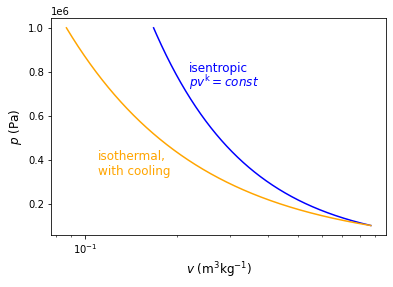

In [8]:
import matplotlib.pyplot as plt
#plt.annotate('n = 0', (0.25,110), color='Blue', fontsize=12)
#plt.annotate('n = .5', (0.25,145), color='Orange', fontsize=12)
#plt.annotate('n = 1', (0.25,203), color='Green', fontsize=12)
plt.annotate('isothermal,', (0.11,400000), color='Orange', fontsize=12)
plt.annotate('with cooling', (0.11,330000), color='Orange', fontsize=12)
plt.annotate('isentropic', (0.22,800000), color='Blue', fontsize=12)
plt.annotate('$pv^\mathrm{k} = const$', (0.22,730000), color='Blue', fontsize=12)

plt.semilogx(v_isentropic,pressures,color='blue')
plt.semilogx(v_isothermal,pressures,color='orange')
plt.xlabel('$v$ $(\mathrm{m^3 kg^{-1}})$',  fontsize=12)
plt.ylabel('$p$ $({\mathrm{Pa})}$',  fontsize=12)
plt.savefig('Figures/isothermal_compression.png')# used to save the figure if you desire
plt.show()  

```{figure} Figures/isothermal_compression.png
:name: isothermal compression fig a

Pressure verses volume for reversible processes with different polytropic exponents, $n$. The polytropic exponent dictates the path that is taken and is dependent on the amount of heat transfer during the expansion/compression process. 
```

(IsentropicPumpingExample)=
#### Example - Isentropic Pumping

Calculate the work per kg to pump water isentropically from 100 kPa, 30 °C to 5 MPa. Assume steady state, reversible and adiabatic and that the compressed water is incompressible. Compare the specific work to the reversible and non-adiabatic case. KE and PE can be neglected. Solve using cantera and afterwards attempt to solve using NIST Webook data https://webbook.nist.gov/chemistry/fluid/.

> **Solution** - We have two different strategies depending on if it is isothermal and reversible or adiabatic and reversible (i.e. isentropic). If isothermal, then we can use {eq}`eq_ddd` and we need only determine the specific volume. If isentropic, then we can calculate the inlet specific entropy (knowing temperature and pressure), and equate to the exit entropy. This will help set state 2s because we also know the exit pressure is 5 MPa.

In [12]:
import cantera as ct
#State 1
T1 = 30+273.15 #K
P1 = 100*1000 # Pa

species1 = ct.Water()# define state 1
species1.TP = T1, P1
s1=species1.ST[0] #J/kg/K
h1=species1.HP[0] #J/kg

In [18]:
#State 2, if isothermal
T2 = T1 # if isentropic
P2 =5*1000*1000 # Pa 

species2 = ct.Water()# define state 2
species2.TP = T2, P2
v=species2.TV[1] #m^3/kg
iso_specific_work = -v*(P2-P1)
print("The reversible and isothermal specific pump work is ", round(iso_specific_work/1000, 2), " kJ/kg")

The reversible and isothermal specific pump work is  -115.62  kJ/kg


In [19]:
#State 2s, if isentropic
s2s=s1 # if isentropic
P2s =5*1000**1000 # Pa 

species2s = ct.Water()# define state 2
species2s.SP = s2s, P2
h2s=species2s.HP[0] #J/kg
isen_specific_work = -(h2s-h1)
print("The isentropic specific pump work is ", round(isen_specific_work/1000, 2), " kJ/kg")

The isentropic specific pump work is  -161.19  kJ/kg


## Isentropic Efficiency

```{index} isentropic efficiency
```

The {ref}`isentropic efficiency <genindex>` is a measure of the work input or output of a real process (i.e., irreversible) relative to the idealized or isentropic process. The comparison is always made for adiabatic systems between the same two pressures and for identical mass flowrates. As it is an efficiency, it is always a value that is constrained to be between 0 and 1. And thus, in the case of a turbine where the real work output will always be less than the reversible work output, the isentropic efficiency ($\eta_t$) is the ratio of the real work output relative to the isentropic work output, as seen below.

```{math}
:label: eq_hh 
\eta_{\rm t} = \frac{\dot W}{(\dot W)_{\rm s}} = \frac{h_1-h_2}{h_1-h_{2s}}
``` 

Here, the subscript s refers to the isentropic state after expansion, state 1 refers to the inlet and state 2 to the exit.  This process can be seen below in {numref}`Figure %s <isentropic efficiency turbine fig b>` on a $T-s$ diagram that uses air as the working fluid between 2 MPa to 500 kPa. Notice that the real expansion is associated with an increase in entropy because of the irreversibilities. 

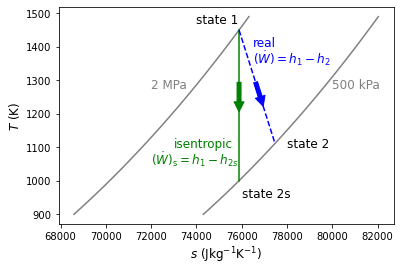

In [42]:
import cantera as ct
import numpy as np
from scipy.optimize import fsolve
import matplotlib.patches as mpatches
species1,species2s,species2=ct.Solution('gri30.yaml'),ct.Solution('gri30.yaml'),ct.Solution('gri30.yaml')
species_i,species_e=ct.Solution('gri30.yaml'),ct.Solution('gri30.yaml') # for constant inlet pressures and exit pressures
pi=2*1000*1000 #pa, inlet pressure of the turbine
pe=500*1000 #pa, exit pressure of the turbine
T_list=np.arange(900,1500,10) #Range of temperatures to consider, in K
s_i=[] #entropies at high P
s_e=[] # entropies at low P
for i in T_list:
    species_i.TP=i,pi
    species_e.TP=i,pe
    s_i.append(species_i.SP[0])
    s_e.append(species_e.SP[0])
    
T1 = T_list[-5] #inlet temperature of turbine
species1.TP=T1,pi
s1=species1.SP[0]
s2s=s1
species2s.SP=s2s,pe
T2s=species2s.TP[0]
T_isen=[T1,T2s]
s_isen=[s1,s2s]

T2=T2s/0.9
species2.TP=T2,pe
s2=species2.SP[0]
T_real=[T1,T2]
s_real=[s1,s2]

import matplotlib.pyplot as plt
fig,ax= plt.subplots(1,1)
#plt.annotate('n = 0', (0.25,110), color='Blue', fontsize=12)
#plt.annotate('n = .5', (0.25,145), color='Orange', fontsize=12)
#plt.annotate('n = 1', (0.25,203), color='Green', fontsize=12)
#plt.annotate('isothermal,', (0.11,400000), color='Orange', fontsize=12)
#plt.annotate('with cooling', (0.11,330000), color='Orange', fontsize=12)
ax.text(74000,1470,'state 1', color='black', fontsize=12)
ax.text(78000,1100,'state 2', color='black', fontsize=12)
ax.text(76000,950,'state 2s', color='black', fontsize=12)
ax.text(72000,1275,'2 MPa', color='gray', fontsize=12)
ax.text(80000,1275,'500 kPa', color='gray', fontsize=12)

ax.text(73000,1100,'isentropic', color='green', fontsize=12)
ax.text(72000,1050,r'$(\dot W)_{\rm s}=h_1-h_{2s}$', color='green', fontsize=12)
ax.text(76500,1400,'real', color='Blue', fontsize=12)
ax.text(76500,1350,r'$(\dot W)=h_1-h_2$', color='blue', fontsize=12)


ax.plot(s_i,T_list,color='gray')
ax.plot(s_e,T_list,color='gray')
ax.plot(s_isen,T_isen,color='green')
ax.plot(s_real,T_real,color='blue',linestyle='dashed')
def T(s):
    return (T1-T2)/(s1-s2)*s+(T1-((T1-T2)/(s1-s2))*s1)
def s(T):
    return (T-(T1-((T1-T2)/(s1-s2))*s1))/((T1-T2)/(s1-s2))
m=(T1-T2)/(s1-s2)
def dS(dT):
    return dT/m
def magnitude(dT):
    return (dT**2+dS(dT)**2)**0.5

   
length=-100

def func(dT):
    return length+magnitude(dT)
root = fsolve(func, -100)

offset_T=150

arrow1 = mpatches.FancyArrowPatch((s1, T1-offset_T), (s1, T1-offset_T+length),
                                 mutation_scale=20,color='green')
arrow2 = mpatches.FancyArrowPatch((s(T1-offset_T), T1-offset_T), (s(T1-offset_T)+4*root[0]/m,T1-offset_T+4*root[0]),
                                 mutation_scale=20,color='blue')
ax.add_patch(arrow1)
ax.add_patch(arrow2)
#plt.arrow(s1, T1-offset_T, 0, length, width = 100, head_width=300,head_length=50,color='r')

#plt.arrow(s(T1-offset_T), T1-offset_T, root[0]/m,root[0],head_width=300,head_length=500,color='r')


ax.set_xlabel('$s$ $(\mathrm{J kg^{-1} K^{-1}})$',  fontsize=12)
ax.set_ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
plt.savefig('Figures/isentropic_efficiency_turbine.png')# used to save the figure if you desire
plt.show()  

```{figure} Figures/isentropic_efficiency_turbine.png
:name: isentropic efficiency turbine fig b

Isentropic expansion of air from 2 MPa to 500 kPa is shown in green. The real and irreversible expansion of air between the same pressures is shown in blue. As seen, the real change in temperature (and therefore change in specific enthalpy) is always less than or equal to the isentropic case.
```

In the case of a compressor or pump, the isentropic work is always less than the real work. Therefore, the isentropic efficiency ($\eta_c$) is the ratio of the isentropic work input relative to the real work input, as seen below.

```{math}
:label: eq_ii 
\eta_{\rm c} = \frac{(\dot W)_{\rm s}}{\dot W} = \frac{h_1-h_{2s}}{h_1-h_2}
``` 

Like the turbine, the subscript s refers to the isentropic state after expansion, state 1 refers to the inlet and state 2 to the exit. A comparison of  isentropic and real compression is shown below in {numref}`Figure %s <isentropic efficiency compressor fig c>` on a $T-s$ diagram, again with air as the working fluid, being compressed between 500 kPa and 2 MPa.

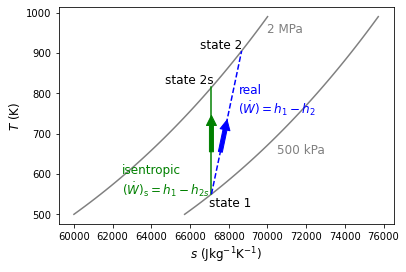

In [6]:
import cantera as ct
import numpy as np
from scipy.optimize import fsolve
import matplotlib.patches as mpatches
species1,species2s,species2=ct.Solution('gri30.yaml'),ct.Solution('gri30.yaml'),ct.Solution('gri30.yaml')
species_i,species_e=ct.Solution('gri30.yaml'),ct.Solution('gri30.yaml') # for constant inlet pressures and exit pressures
pe=2*1000*1000 #pa, inlet pressure of the turbine
pi=500*1000 #pa, exit pressure of the turbine
T_list=np.arange(500,1000,10) #Range of temperatures to consider, in K
s_i=[] #entropies at high P
s_e=[] # entropies at low P
for i in T_list:
    species_i.TP=i,pi
    species_e.TP=i,pe
    s_i.append(species_i.SP[0])
    s_e.append(species_e.SP[0])
    
T1 = T_list[5] #inlet temperature of turbine
species1.TP=T1,pi
s1=species1.SP[0]
s2s=s1
species2s.SP=s2s,pe
T2s=species2s.TP[0]
T_isen=[T1,T2s]
s_isen=[s1,s2s]

T2=T2s/0.9
species2.TP=T2,pe
s2=species2.SP[0]
T_real=[T1,T2]
s_real=[s1,s2]

import matplotlib.pyplot as plt
fig,ax= plt.subplots(1,1)
#plt.annotate('n = 0', (0.25,110), color='Blue', fontsize=12)
#plt.annotate('n = .5', (0.25,145), color='Orange', fontsize=12)
#plt.annotate('n = 1', (0.25,203), color='Green', fontsize=12)
#plt.annotate('isothermal,', (0.11,400000), color='Orange', fontsize=12)
#plt.annotate('with cooling', (0.11,330000), color='Orange', fontsize=12)
ax.text(67000,520,'state 1', color='black', fontsize=12)
ax.text(64700,825,'state 2s', color='black', fontsize=12)
ax.text(66500,910,'state 2', color='black', fontsize=12)
ax.text(70000,950,'2 MPa', color='gray', fontsize=12)
ax.text(70500,650,'500 kPa', color='gray', fontsize=12)

ax.text(62500,600,'isentropic', color='green', fontsize=12)
ax.text(62500,550,r'$(\dot W)_{\rm s}=h_1-h_{2s}$', color='green', fontsize=12)
ax.text(68500,800,'real', color='Blue', fontsize=12)
ax.text(68500,750,r'$(\dot W)=h_1-h_2$', color='blue', fontsize=12)


ax.plot(s_i,T_list,color='gray')
ax.plot(s_e,T_list,color='gray')
ax.plot(s_isen,T_isen,color='green')
ax.plot(s_real,T_real,color='blue',linestyle='dashed')
def T(s):
    return (T1-T2)/(s1-s2)*s+(T1-((T1-T2)/(s1-s2))*s1)
def s(T):
    return (T-(T1-((T1-T2)/(s1-s2))*s1))/((T1-T2)/(s1-s2))
m=(T1-T2)/(s1-s2)
def dS(dT):
    return dT/m
def magnitude(dT):
    return (dT**2+dS(dT)**2)**0.5

   
length=100

def func(dT):
    return length-magnitude(dT)
root = fsolve(func, 100)

offset_T=-100

arrow1 = mpatches.FancyArrowPatch((s1, T1-offset_T), (s1, T1-offset_T+length),
                                 mutation_scale=20,color='green')
arrow2 = mpatches.FancyArrowPatch((s(T1-offset_T), T1-offset_T), (s(T1-offset_T)+4*root[0]/m,T1-offset_T+4*root[0]),
                                 mutation_scale=20,color='blue')
ax.add_patch(arrow1)
ax.add_patch(arrow2)
#plt.arrow(s1, T1-offset_T, 0, length, width = 100, head_width=300,head_length=50,color='r')

#plt.arrow(s(T1-offset_T), T1-offset_T, root[0]/m,root[0],head_width=300,head_length=500,color='r')


ax.set_xlabel('$s$ $(\mathrm{J kg^{-1} K^{-1}})$',  fontsize=12)
ax.set_ylabel('$T$ $({\mathrm{K})}$',  fontsize=12)
plt.savefig('Figures/isentropic_efficiency_compressor.png')# used to save the figure if you desire
plt.show()  

```{figure} Figures/isentropic_efficiency_compressor.png
:name: isentropic efficiency compressor fig c

Isentropic compression of air from 500 kPa to 2 MPa is shown in green. The real and irreversible compresion of air between the same pressures is shown in blue. As seen, the real change in temperature (and therefore change in specific enthalpy) is always greater than or equal to the isentropic case.
```

(IsentropicEfficiencyExample1)=
### Example - Isentropic Efficiency

Consider an adiabatic steam turbine that is NOT reversible. Steam enters at 3 MPa and 400 °C and exits at 50 kPa and 100 °C. Determine the isentropic efficiency, $\eta_{\rm T}$, and the mass flowrate. The power output from the steam turbine is 2 MW.

> **Solution** - We know the initial temperature and pressure, and the exit pressure. To determine state 2s we can use this pressure and the entropy at state 1. To determine state 2 we know the exit pressure and real temperature. Thus, each state can be defined and therefore the enthalpies at each state. Knowing the enthalpies we can solve for the isentropic turbine efficiency using {eq}`eq_hh`. To determine the mass flowrate we will draw a control volume around the turbine and use the open system energy conservation equation which reduces to $\dot W_{\rm net} = \dot m(h_{\rm 1}-h_{\rm 2})$.

In [12]:
import cantera as ct
#State 1
T1 = 400+273.15 #K
P1 = 3*1000*1000 # Pa

species1 = ct.Water()# define state 1
species1.TP = T1, P1
s1=species1.ST[0] #J/kg/K
h1=species1.HP[0] #J/kg

#State 2
T2= 100+273.15 #K
P2 = 50*1000 # Pa

species2 = ct.Water()# define state 2
species2.TP = T2, P2
h2=species2.HP[0] #J/kg

#State 2s
s2s=s1 # isentropic
P2 = 50*1000 # Pa # same as state 2

species2s = ct.Water()# define state 2
species2s.SP = s2s, P2
h2s=species2s.HP[0] #J/kg

In [13]:
# part 1

eta_T=(h1-h2)/(h1-h2s) #definition of isentropic efficiency for a turbine
print("The isentropic efficiency is ", round(eta_T, 2))

The isentropic efficiency is  0.67


In [14]:
# part 2

power = 2*1000*1000 # W, power output of the real turbine
m_dot=power/(h1-h2) #open system energy conservation equation for an adiabatic turbine, ignoring changes in kinetic and potential energies
print("The mass flowrate is ", round(m_dot, 2), " kg/s")

The mass flowrate is  3.65  kg/s


(IsentropicEfficiencyExample2)=
### Example - Isentropic Efficiency Iterative Solution Approach

Steam enters a vapor turbine with isentropic efficiency of 90%. If it enters at 2 MPa, 300 °C, and leaves as a saturated mixture with quality equal to 0.9, what is the exit pressure? 

> **Solution** - This problem requires more careful analysis compared to the prior example {numref}`IsentropicEfficiencyExample1` {ref}`IsentropicEfficiencyExample1`. This is because we now are asked to solve for the exit pressure. Recall that in the isentropic efficiency equation ({eq}`eq_hh`), enthalpies at state 2 and 2s are required to solve for efficiency. And if we know the isentropic efficiency and one of these states then we can solve for the enthalpy of the other. In this problem, we know the efficiency, but both state 2 and state 2s depend on the same pressure and they cannot therefore be solved independently. Therefore, we will have to "guess" an exit pressure, calulate the enthalpy at state 2s, use this to solve for the enthalpy at state 2 with {eq}`eq_hh`, and then knowing enthalpy and pressure at state 2, we can calculate the quality and compare to the known quality. Alternatively we can set state 2 and 2s using a guessed pressure, s2s and the known x2, to determine the enthalpies at state 2 and 2s to calculate the isentropic efficiency and compare to the known efficiency of 90%. If incorrect, then we will have to try again until we converge on the solution. This is called an iterative solution approach (or guess and check approach) because we can not solve for the solution analytically. Lets see what this looks like when we use the first approach of checking to see if the quality is the same as the known quality of 0.9. Then we will follow up with a graphical and then numerical strategy to help us solve for the exact pressure rather than iterating ourselves.

In [46]:
import cantera as ct
state1,state2s,state2=ct.Water(),ct.Water(),ct.Water()

eta_T = 0.9
T1,P1 = 300+273.15,2*1000*1000 #K,Pa
x2=0.9
state1.TP=T1,P1
s1=state1.ST[0] #J/kg/K
h1=state1.HP[0] #J/kg
s2s=s1

In [47]:
pguess = 50*1000 #Pa # try inputting different values, e.g. 100 kPa, 20 kPa and 50 kPa
state2s.SP=s2s,pguess
h2s=state2s.HP[0]
h2=h1-eta_T*(h1-h2s) #solve for h2
state2.HP=h2,pguess
round(state2.PQ[1],3) # determine the quality at state 2 using the guessed pressure. As seen, when the guess is 50 kPa the quality approaches the known quality of 0.9

0.902

> **Solution - graphical approach** - Below is a graphical strategy to help solve for the exact pressure without having to iterate iterating ourselves.

In [49]:
import cantera as ct
pguess=np.arange(1,100,1) #kPa, list pressure guesses
T1,P1 = 300+273.15,2*1000*1000 #K,Pa
quality=[] # set empty array of qualities - we will solve for qualities at each pguess and compare to the known quality of 0.9
for i in pguess: #use a for loop to iterate
    species1.TP=T1,P1
    s1=species1.SP[0]
    h1=species1.HP[0]
    s2s=s1
    species2s.SP=s2s,i*1000 # multiply by 1000 to ensure pressure in untis Pa
    h2s=species2s.HP[0]
    h2=h1-0.9*(h1-h2s)
    species2.HP=h2,i*1000
    quality.append(species2.PQ[1]) #calulate quality at pguess and append to list of qualities

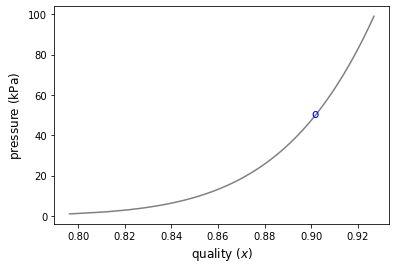

In [51]:
import matplotlib.pyplot as plt
#plt.plot(quality,pguess)
fig,ax= plt.subplots(1,1)

ax.text(0.9,49,'o', color='Blue', fontsize=12)



ax.plot(quality,pguess,color='gray')

ax.set_xlabel('quality ($x$)',  fontsize=12)
ax.set_ylabel('pressure $({\mathrm{kPa})}$',  fontsize=12)

plt.show()

> **Solution - numerical approach** - Below is a numerical strategy that uses the fsolve function in python to help solve for the exact pressure without having to iterate iterating ourselves. Note, we could also use a minimize function.

In [55]:
import cantera as ct
import numpy as np
from scipy.optimize import fsolve

state1,state2s,state2=ct.Water(),ct.Water(),ct.Water()

eta_T = 0.9
T1,P1 = 300+273.15,2*1000*1000 #K,Pa
x2=0.9
state1.TP=T1,P1
s1=state1.ST[0] #J/kg/K
h1=state1.HP[0] #J/kg
s2s=s1

def quality(p2):
    state2s.SP=s2s,p2
    h2s=state2s.HP[0]
    h2=h1-eta_T*(h1-h2s) #solve for h2
    state2.HP=h2,p2
    return state2.PQ[1]

def func(p2):
    return x2-quality(p2)
root = fsolve(func, 80*1000) # the initial guess for pressure is 80 kPa
print("The exact pressure, determined using the fsolve function is", round(root[0]/1000, 2), "kPa")

The exact pressure, determined using the fsolve function is 47.43 kPa
